# DIGIT RECOGNIZER



## Task

The question or problem definition for Digit Recognizer competition is [described here at Kaggle](https://www.kaggle.com/c/digit-recognizer).

> goal is to correctly identify or classify digits from a dataset of tens of thousands of handwritten images.

## Data

>MNIST ("Modified National Institute of Standards and Technology") is the de facto “hello world” dataset of computer vision. Since its release in 1999, this classic dataset of handwritten images has served as the basis for benchmarking classification algorithms

The Data files contain gray-scale images of hand-drawn digits, from zero through nine.
 
>>Each image is 28 pixels in height and 28 pixels in width, for a total of 784 pixels in total. Each pixel has a single pixel-value associated with it, indicating the lightness or darkness of that pixel, with higher numbers meaning darker. This pixel-value is an integer between 0 and 255, inclusive.


## Loading Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as pt
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

## Loading Data

In [2]:
data = pd.read_csv('train.csv')

In [3]:
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


The training data set, (train.csv), has 785 columns. The first column, called "label", is the digit that was drawn by the user. The rest of the columns contain the pixel-values of the associated image.

Each pixel column in the training set has a name like pixelx, where x is an integer between 0 and 783, inclusive. To locate this pixel on the image, suppose that we have decomposed x as x = i * 28 + j, where i and j are integers between 0 and 27, inclusive. Then pixelx is located on row i and column j of a 28 x 28 matrix, (indexing by zero).

In [4]:
data.shape

(42000, 785)

### Form Input and Output

>Input (x) contains all the features of data except the label 

>Output (y) contains label of the data

In [5]:
y  = data['label']
x = data.drop(['label'],axis=1)

### Split the data into training and validation sets

In [6]:
x_train , x_test , y_train, y_test = train_test_split(x, y, test_size=0.3 ,stratify=y, random_state=1)

### convert the datasets to numpy values representation

In [7]:
x_train = x_train.values 
y_train = y_train.values
x_test = x_test.values
y_test = y_test.values

### Training the classification models

>Decision Tree Classifier

In [8]:
clf = DecisionTreeClassifier()
clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)
accuracy_score(y_pred,y_test)

0.8513492063492063

> Visualizing and predicting an instance of test data   

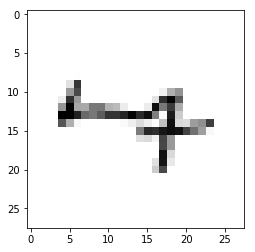

In [9]:
d = x_test[5]
d.shape =(28,28)
pt.imshow(255-d, cmap='gray')
pt.show()

In [10]:
print(clf.predict(x_test[5].reshape(1,-1)))

[4]


> KNeighborsClassifier

In [11]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(x_train, y_train)
Y_pred = knn.predict(x_test)
accuracy_score(Y_pred,y_test)

0.9645238095238096

> Random Forest Classifier

In [12]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(x_train, y_train)
y_pred = random_forest.predict(x_test)
accuracy_score(y_pred,y_test)

0.9611111111111111

KNeighborsClassifier is the most accurate model.